# **Q2**

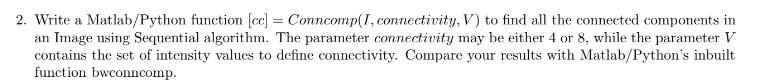

**The python's inbuilt function for bwconcomp is skimage.measure.label**

**Import the required libraries**

In [199]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import skimage.measure as sk

In [200]:
# Hoshen Kopelman Algorithm using Union Find
def connectivity_4(img, V):

    parent = np.zeros(img.shape[0] * img.shape[1] + 1)

    for i in range(parent.shape[0]):
        parent[i] = i

    def make_union(a, b):
        parent[find_parent(a)] = find_parent(b)

    def find_parent(a):
        a = int(a)
        if parent[a] == a:
            return a
        else:
            parent[a] = find_parent(parent[a])
            return parent[a]

    label_num = 0
    labels = np.zeros(img.shape)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):

            left = labels[i][j-1] if j > 0 else 0
            top = labels[i-1][j] if i > 0 else 0

            if img[i][j] in V:
                if left == 0 and top == 0:
                    label_num += 1
                    labels[i][j] = label_num

                elif left != 0 and top == 0:
                    labels[i][j] = find_parent(left)

                elif left == 0 and top != 0:
                    labels[i][j] = find_parent(top)

                else:
                    make_union(left, top)
                    labels[i][j] = find_parent(left)

    labels = labels.astype(int)
    return labels

def connectivity_8(img, V):
    
    labels = [[0 for i in range(img.shape[1])] for j in range(img.shape[1])]
    eq = []
    label_num = 0

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):

            if img[i][j] in V:
                neigh = [(i-1, j-1), (i-1, j), (i-1, j+1), (i, j-1)]   
                diff = []     

                for x, y in neigh:
                    if 0 <= x < img.shape[0] and 0 <= y < img.shape[1] and img[x][y] in V:
                        if labels[x][y] != 0:
                            diff.append(labels[x][y])

                if diff:
                    labels[i][j] = min(diff)
                    if len(set(diff)) > 1:
                        eq.append(set(diff))

                else:
                    label_num += 1
                    labels[i][j] = label_num

    for i in range(len(eq)):
        for j in range(i+1, len(eq)):
            if eq[i].intersection(eq[j]):
                eq[i] = eq[i].union(eq[j])
                eq[j] = set()
    
    # Merge the labels
    for i in range(len(eq)):
        if eq[i]:
            for j in range(len(labels)):
                for k in range(len(labels[0])):
                    if labels[j][k] in eq[i]:
                        labels[j][k] = min(eq[i])
                        
    return labels                   

In [201]:
def concomp(img, connectivity, V):
    if connectivity == 4:
        return connectivity_4(img, V)
    elif connectivity == 8:
        return connectivity_8(img, V)
    else:
        print("Invalid connectivity")
        return None

**Testcase 1**

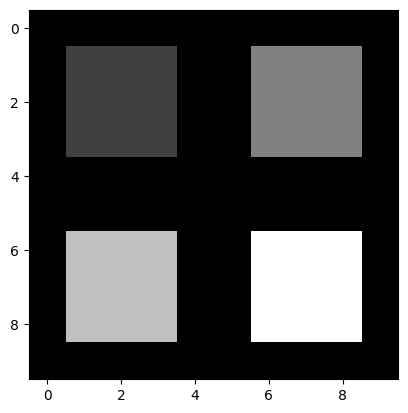

In [202]:
# Testcase 1
# Create a grayscale Image with 4 connected components
img = np.zeros((10, 10))
img[1:4, 1:4] = 1
img[1:4, 6:9] = 2
img[6:9, 1:4] = 3
img[6:9, 6:9] = 4

# Show the image
plt.imshow(img, cmap='gray')

In [203]:
labels = concomp(img, 4, [1, 2, 3, 4])

# Show the labels
print(labels)

[[0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 2 2 2 0]
 [0 1 1 1 0 0 2 2 2 0]
 [0 1 1 1 0 0 2 2 2 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 3 3 3 0 0 4 4 4 0]
 [0 3 3 3 0 0 4 4 4 0]
 [0 3 3 3 0 0 4 4 4 0]
 [0 0 0 0 0 0 0 0 0 0]]


#### As we can see our output is correct.

#### Now let's test this with inbuilt function from skimage

In [204]:
# Testing using inbuilt function
labels = sk.label(img, connectivity=1)
print(labels)

[[0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 2 2 2 0]
 [0 1 1 1 0 0 2 2 2 0]
 [0 1 1 1 0 0 2 2 2 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 3 3 3 0 0 4 4 4 0]
 [0 3 3 3 0 0 4 4 4 0]
 [0 3 3 3 0 0 4 4 4 0]
 [0 0 0 0 0 0 0 0 0 0]]


#### Perfect!!

**Testcase 2**

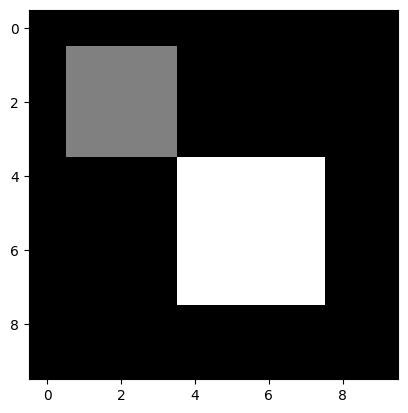

In [205]:
# Testcase where Kopehman Hoshen Algorithm may fail if equivalence is not maintained
img = np.zeros((10, 10))
img[1:4, 1:4] = 1
img[4:8, 4:8] = 2

# Show the image
plt.imshow(img, cmap='gray')

In [206]:
labels = concomp(img, 4, [1, 2])

# Show the labels
print(labels)

[[0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 2 2 2 2 0 0]
 [0 0 0 0 2 2 2 2 0 0]
 [0 0 0 0 2 2 2 2 0 0]
 [0 0 0 0 2 2 2 2 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [207]:
# Checking using inbuilt function
labels1 = sk.label(img, connectivity=1)
print(labels1)

[[0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 2 2 2 2 0 0]
 [0 0 0 0 2 2 2 2 0 0]
 [0 0 0 0 2 2 2 2 0 0]
 [0 0 0 0 2 2 2 2 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


**Checking whether the output matches with the inbuilt function**

In [208]:
for i in range(len(labels)):
    for j in range(len(labels[0])):
        if labels[i][j] != labels1[i][j]:
            print("Error at", i, j, labels[i][j], labels1[i][j])

**As we can see our output is correct.**

**Testcase 3**

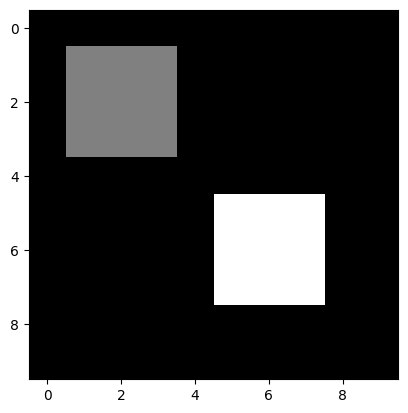

In [209]:
# Testcase where Kopehman Hoshen Algorithm may fail if equivalence is not maintained
img = np.zeros((10, 10))
img[1:4, 1:4] = 1
img[5:8, 5:8] = 2

# Show the image
plt.imshow(img, cmap='gray')

In [210]:
labels = concomp(img, 8, [1, 2])

# Show the labels
print(labels)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 1, 1, 0, 0, 0, 0, 0, 0], [0, 1, 1, 1, 0, 0, 0, 0, 0, 0], [0, 1, 1, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 2, 2, 2, 0, 0], [0, 0, 0, 0, 0, 2, 2, 2, 0, 0], [0, 0, 0, 0, 0, 2, 2, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


In [211]:
# Checking using inbuilt function
labels1 = sk.label(img, connectivity=2)
print(labels1)

[[0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 2 2 0 0]
 [0 0 0 0 0 2 2 2 0 0]
 [0 0 0 0 0 2 2 2 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


**Checking whether the output matches with the inbuilt function**

In [212]:
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if labels[i][j] != labels1[i][j]:
            print("error", i, j, labels[i][j], labels1[i][j])

**For image I took 2 pictures given in the assignment namely of Q3 and Q4.**

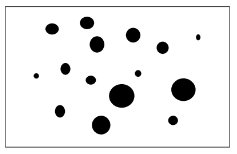

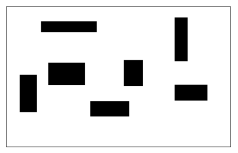

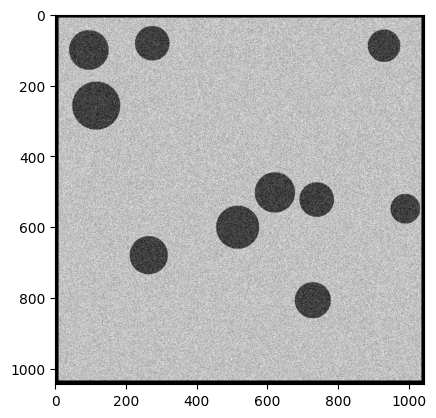

In [221]:
# Read the image in grayscale format
img1 = cv2.imread('Q3.png')
img2 = cv2.imread('Q4.png')

# Convert the image to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Print the gray scale image
plt.imshow(gray1, cmap='gray')

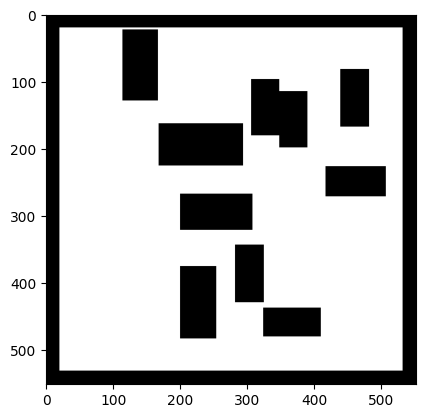

In [222]:
plt.imshow(gray2, cmap='gray')

**Running the code for Q3.PNG**

**4 and 8 connectivity**

In [213]:
# Read the image
img = cv2.imread('Q3.png')

# Convert to grayscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

labels1 = concomp(img, 4, [1, 2])

# Show the labels
print(labels1)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [214]:
labels2 = sk.label(img, connectivity=1).astype(int)
print(labels2)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [215]:
labels1 = concomp(img, 8, [1, 2])
# Show the labels
print(labels1)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [216]:
labels2 = sk.label(img, connectivity=2).astype(int)
print(labels2)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


**Running the code for Q4.PNG**

**4 and 8 connectivity**

In [217]:
# Read the image
img = cv2.imread('Q4.png')

# Convert to grayscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

labels1 = concomp(img, 4, [1, 2])

# Show the labels
print(labels1)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [218]:
labels2 = sk.label(img, connectivity=1).astype(int)
print(labels2)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [219]:
labels1 = concomp(img, 8, [1, 2])
# Show the labels
print(labels1)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [220]:
labels2 = sk.label(img, connectivity=2).astype(int)
print(labels2)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
